## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


In [2]:
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

Source of the data https://www.kaggle.com/currie32/crimes-in-chicago

I only picked the dataset from 2012-2017 as I eventually want to pick the crimes from 2016. 

In [5]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
#Create a copy of the above dataset

df_pp = df_ppd.copy()
df_pp.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [7]:
df_pp.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
df_pp.drop(['X Coordinate','Y Coordinate','Unnamed: 0','IUCR'],axis =1, inplace = True)
df_pp.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [9]:
#Want to have only the crimes for 2016. This will allow us to focus only on one year.

df_2016 = df_pp.loc[df_pp['Year'] == 2016]
df_2016

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,631,6.0,8.0,44.0,04B,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,133,1.0,3.0,35.0,08B,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,215,2.0,3.0,38.0,08B,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,BATTERY,SIMPLE,SIDEWALK,False,False,2432,24.0,40.0,1.0,08B,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,735,7.0,17.0,67.0,08B,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [10]:
#Look at the number of unique values in year to see that we only have data from 2017.
df_2016['Year'].unique()

array([2016])

## Want to find the crime count by community area.

In [11]:
# Want to find the crime count by neighbourhood.

crime_data = df_2016.groupby(['Community Area']).size().to_frame(name='Count').reset_index()
crime_data

,Community Area,Count
0,1.0,3629
1,2.0,3243
2,3.0,3523
3,4.0,1962
4,5.0,1381
5,6.0,6026
6,7.0,4198
7,8.0,10442
8,9.0,302
9,10.0,1308


## The community area column is only giving the numbers of commmunity area. I'd rather have the names as this is easier to classify.

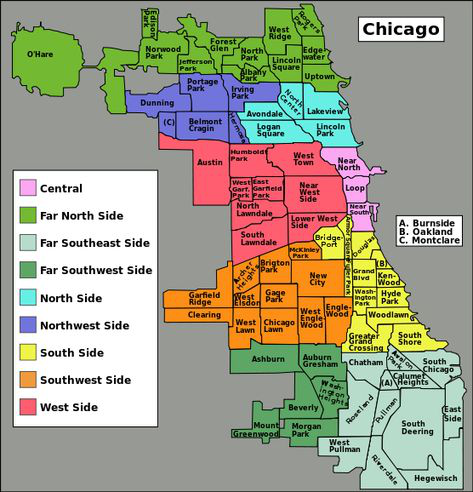

In [69]:
# A visul representation of what the community areas look like is given below.
from PIL import Image
url = 'https://i.pinimg.com/474x/33/72/f3/3372f3663660a70b70d8c746da019291--chicago-events-chicago-area.jpg'

im = Image.open(requests.get(url,stream=True).raw)
im

In [13]:
#Look at all the unique community areas in chicago. WIll use the .replace func to convert all the bumbers to their corresponding names
# The names of the CA's and their respectice numbers were found on wikipedia --> https://en.wikipedia.org/wiki/Community_areas_in_Chicago

df_2016["Community Area"].unique()

array([29., 42., 25., 44., 35., 38.,  1., 67., 43.,  8., 28., 24., 66.,
       40., 73., 39., 41.,  7., 10., 34., 58., 71., 32., 23.,  6., 77.,
       49., 61., 21., 54., 56., 46., 19., 60., 68., 59., 22., 26., 45.,
       30., 11., 69., 31.,  3., 15.,  2., 63., 36., 75., 65., 17., 13.,
       33., 14., 27., 16., 47., 37., 53.,  9., 51., 50., 76., 62.,  4.,
       57., 52., 70., 48., 18., 20.,  5., 12., 64., 74., 55., 72.])

In [44]:
df_2016.loc[:,"Community Area"] = df_2016.loc[:,"Community Area"].astype(str)

In [49]:
#Will do this for all unique community areas
df_2016.loc[:,"Community Area"] = df_2016["Community Area"].replace({"29.0":"North Lawndale"})

In [50]:
#Check to see if method works.
df_2016.loc[:,"Community Area"] = df_2016["Community Area"].replace({"42.0":"Woodlawn","25.0":"Austin","44.0":"Chatham","35.0":"Douglas","38.0":"Grand Boulevard","1.0":"Rogers Park"})
df_2016["Community Area"].unique()

array(['North Lawndale', 'Woodlawn', 'Austin', 'Chatham', 'Douglas',
       'Grand Boulevard', 'Rogers Park', '67.0', '43.0', '8.0', '28.0',
       '24.0', '66.0', '40.0', '73.0', '39.0', '41.0', '7.0', '10.0',
       '34.0', '58.0', '71.0', '32.0', '23.0', '6.0', '77.0', '49.0',
       '61.0', '21.0', '54.0', '56.0', '46.0', '19.0', '60.0', '68.0',
       '59.0', '22.0', '26.0', '45.0', '30.0', '11.0', '69.0', '31.0',
       '3.0', '15.0', '2.0', '63.0', '36.0', '75.0', '65.0', '17.0',
       '13.0', '33.0', '14.0', '27.0', '16.0', '47.0', '37.0', '53.0',
       '9.0', '51.0', '50.0', '76.0', '62.0', '4.0', '57.0', '52.0',
       '70.0', '48.0', '18.0', '20.0', '5.0', '12.0', '64.0', '74.0',
       '55.0', '72.0'], dtype=object)

In [51]:
df_2016.loc[:,"Community Area"] = df_2016["Community Area"].replace({"67.0":"West Englewood","43.0":"South Shore","8.0":"Near North Side","28.0":"Near West Side","24.0":"West Town","66.0":"Chicago Lawn"})
df_2016.loc[:,"Community Area"] = df_2016["Community Area"].replace({"40.0":"Washington Park","73.0":"Washington Heights","39.0":"Kenwood","41.0":"Hyde Park","7.0":"Lincoln Park","10.0":"Norwood Park"})
df_2016.loc[:,"Community Area"] = df_2016["Community Area"].replace({"34.0":"Armour Square","58.0":"Brighton Park","71.0":"Auburn Gresham","32.0":"Loop","23.0":"Humboldt Park","6.0":"Lake View","77.0":"Edgewater"})

In [55]:
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"49.0":"Roseland","61.0":"New City","21.0":"Avondale","54.0":"Riverdale","56.0":"Garfield Ridge","46.0":"South Chicago"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"19.0":"Belmont Cragin","60.0":"Bridgeport","68.0":"Englewood","59.0":"McKinley Park","22.0":"Logan Square","26.0":"West Garfield Park"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"45.0":"Avalon","30.0":"South Lawndale","45.0":"Avalon Park","30.0":"South Lawndale","11.0":"Jefferson Park","69.0":"Greater Grand Crossing"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"31.0":"Lower West Side","3.0":"Uptown","15.0":"Portage Park","2.0":"West Ridge","63.0":"Gage Park","36.0":"Oakland"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"75.0":"Morgan Park","65.0":"West Lawn","17.0":"Dunning","13.0":"North Park","33.0":"Near South Side","14.0":"Albany Park"})


In [57]:
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"27.0":"East Garfield Park","16.0":"Irving Park","47.0":"Burnside","37.0":"Fuller Park","53.0":"West Pullman","9.0":"Edison Park"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"51.0":"South Deering","50.0":"Pullman","76.0":"O'Hare","62.0":"West Elsdon","4.0":"Lincoln Square","57.0":"Archer Heights"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"52.0":"East Side","70.0":"Ashburn","48.0":"Calumet Heights","18.0":"Montclare","20.0":"Hermosa","5.0":"North Center"})
df_2016.loc[:,"Community Area"] =df_2016["Community Area"].replace({"12.0":"Forest Glen","64.0":"Clearing","74.0":"Mount Greenwood","55.0":"Hegewisch","72.0":"Beverly"})

In [58]:
df_2016["Community Area"].unique()

array(['North Lawndale', 'Woodlawn', 'Austin', 'Chatham', 'Douglas',
       'Grand Boulevard', 'Rogers Park', 'West Englewood', 'South Shore',
       'Near North Side', 'Near West Side', 'West Town', 'Chicago Lawn',
       'Washington Park', 'Washington Heights', 'Kenwood', 'Hyde Park',
       'Lincoln Park', 'Norwood Park', 'Armour Square', 'Brighton Park',
       'Auburn Gresham', 'Loop', 'Humboldt Park', 'Lake View',
       'Edgewater', 'Roseland', 'New City', 'Avondale', 'Riverdale',
       'Garfield Ridge', 'South Chicago', 'Belmont Cragin', 'Bridgeport',
       'Englewood', 'McKinley Park', 'Logan Square', 'West Garfield Park',
       'Avalon Park', 'South Lawndale', 'Jefferson Park',
       'Greater Grand Crossing', 'Lower West Side', 'Uptown',
       'Portage Park', 'West Ridge', 'Gage Park', 'Oakland',
       'Morgan Park', 'West Lawn', 'Dunning', 'North Park',
       'Near South Side', 'Albany Park', 'East Garfield Park',
       'Irving Park', 'Burnside', 'Fuller Park', 'West

In [145]:
crime_data = df_2016.groupby(['Community Area']).size().to_frame(name='Count').reset_index()
crime_data.head(10)

,Community Area,Count
0,Albany Park,2387
1,Archer Heights,876
2,Armour Square,1013
3,Ashburn,2689
4,Auburn Gresham,7536
5,Austin,16462
6,Avalon Park,1298
7,Avondale,2263
8,Belmont Cragin,4716
9,Beverly,964


In [146]:
crime_data.rename(index =str, columns={"Community Area":"Community_Area",'Count':'Crime_Count'}, inplace=True)
crime_data.head()

,Community_Area,Crime_Count
0,Albany Park,2387
1,Archer Heights,876
2,Armour Square,1013
3,Ashburn,2689
4,Auburn Gresham,7536


In [147]:
crime_data.describe()

,Crime_Count
count,77.000000
mean,3447.558442
std,2938.419162
min,302.000000
25%,1308.000000
50%,2387.000000
75%,4877.000000
max,16462.000000


In [176]:
#Use folium to create a map

# Looking up Chicago's lat and long coordinates yields the following values:

latitude = 41.8781
longitude = 87.6298

In [231]:
import json
world_geo = r'world_countries.json' # geojson file

#country_geo = 'world-countries.json'
my_USA_map = '../data/us-states.json'


m = folium.Map(location=[41.8781, -87.6298], width=1000, height=750,zoom_start=10)
m

## Will examine the crime types

In [155]:
crime_type = df_2016.groupby(["Description"]).size().to_frame(name='Crime_Type_Count').reset_index()
crime_type

,Description,Crime_Type_Count
0,$500 AND UNDER,24124
1,ABUSE/NEGLECT: CARE FACILITY,4
2,AGG CRIM SEX ABUSE FAM MEMBER,129
3,AGG CRIMINAL SEXUAL ABUSE,166
4,AGG PO HANDS ETC SERIOUS INJ,19
5,AGG PO HANDS NO/MIN INJURY,861
6,AGG PRO EMP HANDS SERIOUS INJ,34
7,AGG PRO.EMP: HANDGUN,30
8,AGG PRO.EMP: OTHER DANG WEAPON,101
9,AGG PRO.EMP: OTHER FIREARM,3


In [156]:
crime_type.describe()

,Crime_Type_Count
count,307.000000
mean,864.697068
std,3155.629697
min,1.000000
25%,8.000000
50%,45.000000
75%,326.000000
max,28302.000000


In [165]:
crimepivot = df_2016.pivot_table(index='Community Area', columns='Description', aggfunc=pd.Series.count, fill_value=0)
crimepivot

Arrest                               \
Description            $500 AND UNDER ABUSE/NEGLECT: CARE FACILITY   
Community Area                                                       
Albany Park                       255                            0   
Archer Heights                     81                            0   
Armour Square                     107                            0   
Ashburn                           256                            0   
Auburn Gresham                    570                            0   
Austin                           1142                            0   
Avalon Park                        88                            0   
Avondale                          215                            0   
Belmont Cragin                    359                            0   
Beverly                           128                            0   
Bridgeport                        186                            0   
Brighton Park                     152                            0   
Burnside                           23                            0   
Calumet Heights                   123                            0   
Chatham                           528                            0   
Chicago Lawn                      434                            0   
Clearing                           87                            0   
Douglas                           299                            0   
Dunning                           148                            0   
East Garfield Park                353                            0   
East Side                         118                            0   
Edgewater                         224                            0   
Edison Park                        33                            0   
Englewood                         373                            0   
Forest Glen                        82                            0   
Fuller Park                        99                            0   
Gage Park                         199                            0   
Garfield Ridge                    214                            0   
Grand Boulevard                   352                            0   
Greater Grand Crossing            490                            0   
...                               ...                          ...   
Near North Side                  1001                            0   
Near South Side                   200                            0   
Near West Side                   1320                            0   
New City                          321                            0   
North Center                      170                            0   
North Lawndale                    506                            0   
North Park                        110                            0   
Norwood Park                      192                            0   
O'Hare                            165                            0   
Oakland                           105                            0   
Portage Park                      306                            0   
Pullman                            94                            0   
Riverdale                          69                            0   
Rogers Park                       379                            0   
Roseland                          524                            0   
South Chicago                     357                            0   
South Deering                     168                            0   
South Lawndale                    390                            0   
South Shore                       630                            0   
Uptown                            370                            0   
Washington Heights                249                            0   
Washington Park                   222                            0   
West Elsdon                       104                            0   
West Englewood                    432    

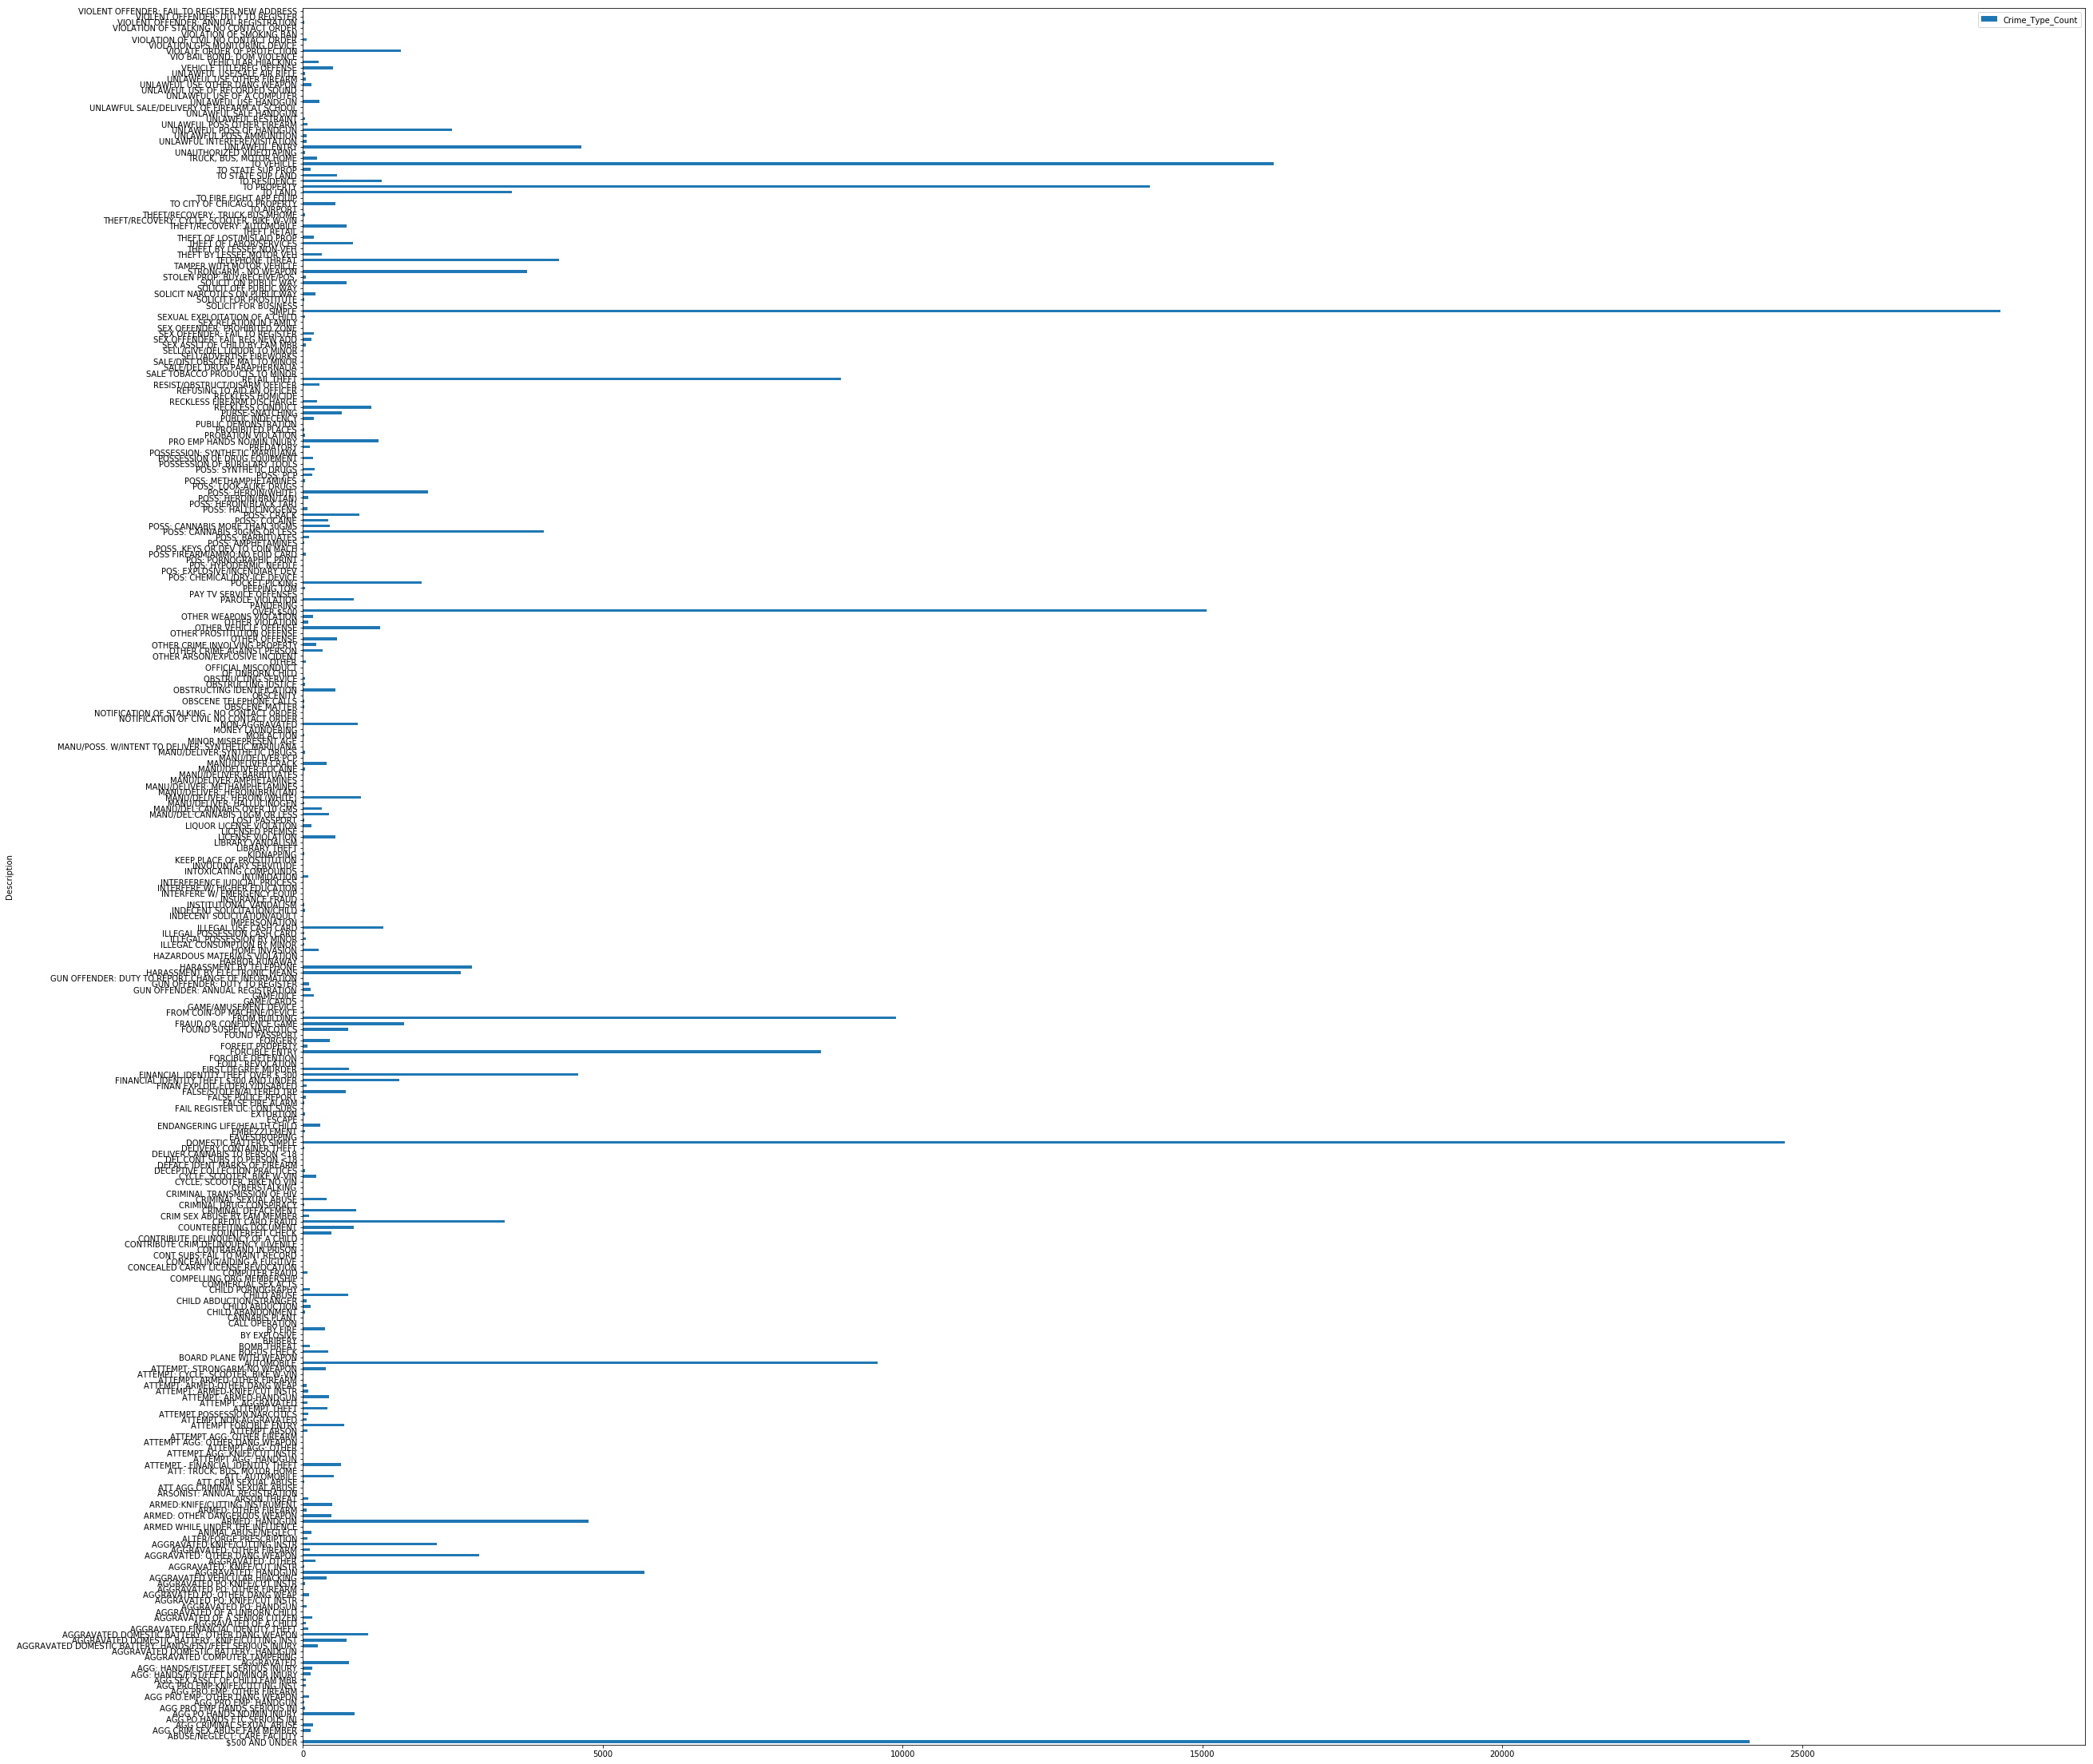

In [170]:
#Want to visualise what are the most common crime types
import matplotlib.pyplot as plt
import seaborn as sns
crime_type.plot(x='Description',y='Crime_Type_Count',kind='barh',figsize=(40,40))

## Want to look at aggravated crimes


In [164]:
aggcrime_df = df_2016.loc[df_2016['Description'] == 'AGGRAVATED']
aggcrime_df

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Location
192,10378401,HZ114481,01/13/2016 05:50:00 PM,012XX E 53RD ST,ROBBERY,AGGRAVATED,BANK,True,False,234,2.0,4.0,Hyde Park,03,2016,05/11/2016 03:48:18 PM,41.799461,-87.596206,"(41.799461412, -87.596206318)"
193,10384630,HZ121001,01/19/2016 04:39:00 PM,059XX N BROADWAY,ROBBERY,AGGRAVATED,BANK,True,False,2013,20.0,48.0,Edgewater,03,2016,05/11/2016 03:48:18 PM,41.989599,-87.660257,"(41.989599401, -87.660256868)"
194,10391121,HZ127825,01/25/2016 08:58:00 AM,017XX W HOWARD ST,ROBBERY,AGGRAVATED,BANK,True,False,2422,24.0,49.0,Rogers Park,03,2016,05/11/2016 03:48:18 PM,42.019399,-87.675440,"(42.019398729, -87.67543958)"
195,10404916,HZ141074,02/05/2016 08:59:00 AM,067XX N RIDGE BLVD,ROBBERY,AGGRAVATED,BANK,True,False,2412,24.0,50.0,West Ridge,03,2016,05/11/2016 03:48:18 PM,42.004487,-87.679846,"(42.004487311, -87.679846425)"
196,10417926,HZ155611,02/18/2016 08:50:00 AM,070XX N WESTERN AVE,ROBBERY,AGGRAVATED,BANK,True,False,2411,24.0,50.0,West Ridge,03,2016,05/11/2016 03:48:18 PM,42.009087,-87.690172,"(42.009087258, -87.690171862)"
199,10434704,HZ172210,03/02/2016 04:54:00 PM,014XX E 53RD ST,ROBBERY,AGGRAVATED,BANK,True,False,234,2.0,4.0,Hyde Park,03,2016,05/11/2016 03:48:18 PM,41.799518,-87.590998,"(41.799518433, -87.590997844)"
1049,10510297,HZ251844,05/05/2016 05:00:00 AM,051XX N KIMBALL AVE,ROBBERY,AGGRAVATED,GAS STATION,False,False,1713,17.0,39.0,North Park,03,2016,05/12/2016 03:50:15 PM,41.974853,-87.713545,"(41.974853031, -87.713545123)"
1650,10511771,HZ253129,05/06/2016 01:40:00 AM,053XX N MILWAUKEE AVE,ROBBERY,AGGRAVATED,CONVENIENCE STORE,False,False,1622,16.0,45.0,Jefferson Park,03,2016,05/13/2016 03:51:16 PM,41.977043,-87.768994,"(41.977043475, -87.76899404)"
1675,10511830,HZ253119,05/06/2016 01:20:00 AM,074XX S WABASH AVE,ROBBERY,AGGRAVATED,SIDEWALK,False,False,323,3.0,6.0,Greater Grand Crossing,03,2016,05/13/2016 03:51:16 PM,41.759351,-87.623169,"(41.759350571, -87.623168543)"
1774,10512474,HZ253415,05/06/2016 10:15:00 AM,011XX N HARDING AVE,ARSON,AGGRAVATED,APARTMENT,False,False,1112,11.0,27.0,Humboldt Park,09,2016,05/13/2016 03:51:16 PM,41.901315,-87.725042,"(41.90131451, -87.725041634)"


In [172]:
aggcrime_data = aggcrime_df.groupby(['Community Area']).size().to_frame(name='Count').reset_index()
aggcrime_data

,Community Area,Count
0,Albany Park,6
1,Archer Heights,1
2,Armour Square,9
3,Ashburn,9
4,Auburn Gresham,24
5,Austin,57
6,Avalon Park,1
7,Avondale,6
8,Belmont Cragin,18
9,Beverly,1


In [174]:
aggcrime_data.describe()

,Count
count,72.000000
mean,10.680556
std,10.136847
min,1.000000
25%,3.000000
50%,7.000000
75%,16.500000
max,57.000000


In [ ]:
# Now want to look at specific locations in Chicago

